In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import graphviz
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-whitegrid')
sns.set_palette('pastel')

%config InlineBackend.figure_format = 'retina'

In [2]:
cc = pd.read_csv('C4.5_cart_results.csv')
pl = pd.read_csv('prune_loss_test.csv')

In [3]:
cc.groupby(['name', 'tree', 'alpha']).mean().drop(columns=['trial'])

acc
name        tree alpha          
german      C4.5 0.0    0.699500
            CART 0.0    0.675000
                 0.5    0.703750
iris        C4.5 0.0    0.430000
            CART 0.0    0.933333
page_blocks C4.5 0.0    0.720731
            CART 0.0    0.962648
seeds       C4.5 0.0    0.773810
            CART 0.0    0.935714
wine        C4.5 0.0    0.636111
            CART 0.0    0.936111

In [4]:
cc.columns

Index(['trial', 'name', 'tree', 'alpha', 'acc'], dtype='object')

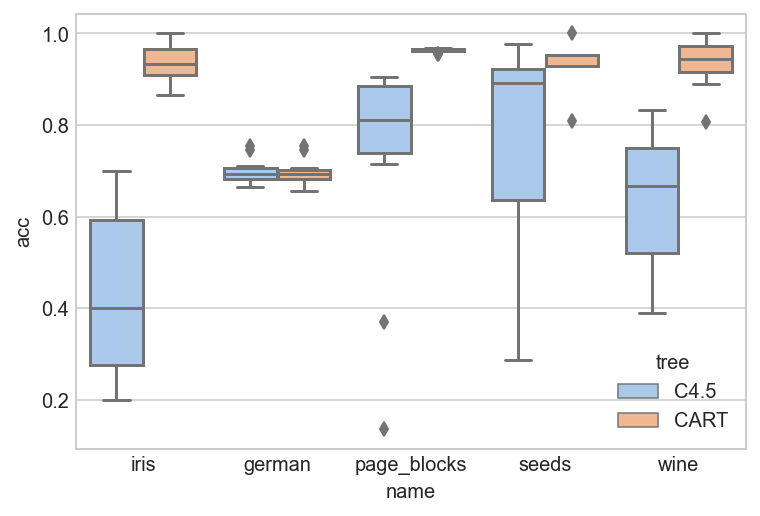

In [5]:
sns.boxplot(x='name', y='acc', hue='tree', data=cc);

In [6]:
prune_methods = ['Reduce', 'Pessim', 'Comp']
losses = ['entropy', 'gini', '0-1']

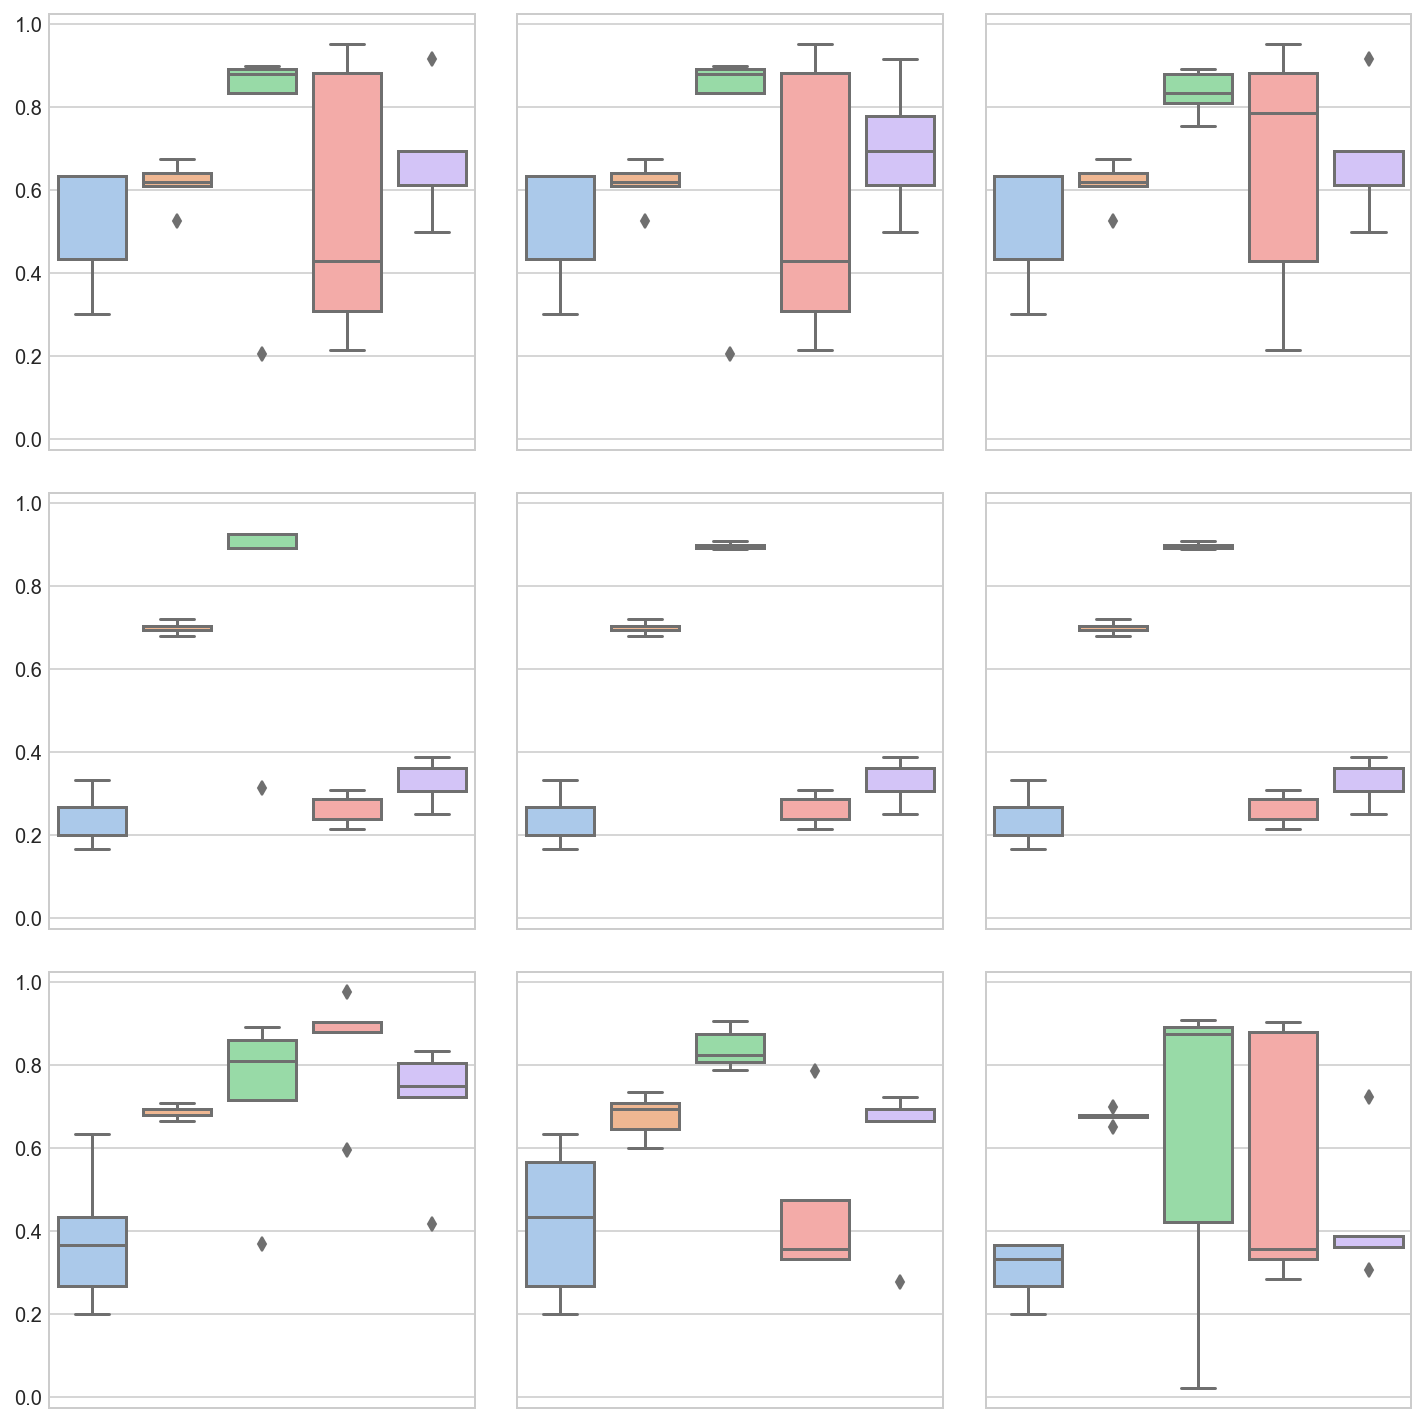

In [7]:
fig, axs = plt.subplots(3, 3, sharey=True, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        data = pl.query(f"prune_method=='{prune_methods[i]}' & loss=='{losses[j]}'")
        a = sns.boxplot(x='name', y='acc', data=data, ax=axs[i, j]);
        _ = a.set(xticklabels=[])
        _ = a.set(xlabel=None)
        _ = a.set(ylabel=None)
plt.tight_layout()
fig.subplots_adjust(hspace=0.1, wspace=0.1)

In [8]:
pl.groupby(['prune_method', 'loss']).mean().drop(columns=['trial'])

acc
prune_method loss             
Comp         0-1      0.517387
             entropy  0.671323
             gini     0.601014
Pessim       0-1      0.488748
             entropy  0.468803
             gini     0.488748
Reduce       0-1      0.653998
             entropy  0.616612
             gini     0.619945